Uber has received some complaints from their customers facing problems related to ride cancellations by the driver and non-availability of cars for a specific route in the city. The uneven supply-demand gap for cabs from City to Airport and vice-versa is causing a bad effect on customer relationships as well as Uber is losing out on its revenue. The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to tackle the situation.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('./uber-data.csv', na_values="NA")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [15]:
df.shape

(6745, 6)

In [16]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [18]:
df['Request timestamp_1'] = pd.to_datetime(df['Request timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Request timestamp_2']=pd.to_datetime(df['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Request timestamp']=df['Request timestamp_2'].combine_first(df['Request timestamp_1'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_1,Request timestamp_2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,NaT,2016-07-11 11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,NaT,2016-07-11 17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,NaT,2016-07-12 09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,NaT,2016-07-12 21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,NaT


In [19]:
df['Drop timestamp_1'] = pd.to_datetime(df['Drop timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Drop timestamp_2']=pd.to_datetime(df['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Drop timestamp']=df['Request timestamp_2'].combine_first(df['Drop timestamp_1'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_1,Request timestamp_2,Drop timestamp_1,Drop timestamp_2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,NaT,2016-07-11 11:51:00,NaT,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,NaT,2016-07-11 17:57:00,NaT,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:17:00,NaT,2016-07-12 09:17:00,NaT,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 21:08:00,NaT,2016-07-12 21:08:00,NaT,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,NaT,2016-07-13 09:25:47,NaT


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Request id           6745 non-null   int64         
 1   Pickup point         6745 non-null   object        
 2   Driver id            4095 non-null   float64       
 3   Status               6745 non-null   object        
 4   Request timestamp    6745 non-null   datetime64[ns]
 5   Drop timestamp       4342 non-null   datetime64[ns]
 6   Request timestamp_1  4071 non-null   datetime64[ns]
 7   Request timestamp_2  2674 non-null   datetime64[ns]
 8   Drop timestamp_1     1681 non-null   datetime64[ns]
 9   Drop timestamp_2     1150 non-null   datetime64[ns]
dtypes: datetime64[ns](6), float64(1), int64(1), object(2)
memory usage: 527.1+ KB


## Feature Engineering

In [23]:
# Getting request hour
df["RequestHour"] = df["Request timestamp"].dt.hour
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_1,Request timestamp_2,Drop timestamp_1,Drop timestamp_2,RequestHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,NaT,2016-07-11 11:51:00,NaT,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,NaT,2016-07-11 17:57:00,NaT,2016-07-11 18:47:00,17


In [25]:
df["Status"].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [26]:
df["Car Availability"] = df["Status"].apply(lambda x: "Available" if x == "Trip Completed" else "Not Available")
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_1,Request timestamp_2,Drop timestamp_1,Drop timestamp_2,RequestHour,Car Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,NaT,2016-07-11 11:51:00,NaT,2016-07-11 13:00:00,11,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,NaT,2016-07-11 17:57:00,NaT,2016-07-11 18:47:00,17,Available


In [27]:
df["Car Availability"].unique()

array(['Available', 'Not Available'], dtype=object)

In [28]:
df["TimeSlot"] = df["RequestHour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
                                                                        if x<=9 else ("Noon"
                                                                                      if x<=16 else ("Late Evening"
                                                                                                     if x<=21 else "Night"))))

df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_1,Request timestamp_2,Drop timestamp_1,Drop timestamp_2,RequestHour,Car Availability,TimeSlot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,NaT,2016-07-11 11:51:00,NaT,2016-07-11 13:00:00,11,Available,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,NaT,2016-07-11 17:57:00,NaT,2016-07-11 18:47:00,17,Available,Late Evening


In [29]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request timestamp_1',
       'Request timestamp_2', 'Drop timestamp_1', 'Drop timestamp_2',
       'RequestHour', 'Car Availability', 'TimeSlot'],
      dtype='object')

In [30]:
col_to_drop = ['Request timestamp_1',
       'Request timestamp_2', 'Drop timestamp_1', 'Drop timestamp_2']

df.drop(col_to_drop, inplace = True, axis = 1)

In [32]:
df.to_csv('uber.csv', index=False)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,Car Availability,TimeSlot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,11,Available,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,17,Available,Late Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:17:00,9,Available,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 21:08:00,21,Available,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Available,Early Morning


### In-Depth Analysis of the Data

In [33]:
df.describe()

,Request id,Driver id,Request timestamp,Drop timestamp,RequestHour
count,6745.000000,4095.000000,6745,4342,6745.000000
mean,3384.644922,149.501343,2016-07-13 13:43:04.303039232,2016-07-13 00:35:15.174804224,12.956709
min,1.000000,1.000000,2016-07-11 00:00:00,2016-07-11 00:00:00,0.000000
25%,1691.000000,75.000000,2016-07-12 07:51:00,2016-07-11 20:01:15,7.000000
50%,3387.000000,149.000000,2016-07-13 14:23:37,2016-07-12 17:36:30,13.000000
75%,5080.000000,224.000000,2016-07-14 19:39:27,2016-07-14 01:03:35.249999872,19.000000
max,6766.000000,300.000000,2016-07-15 23:59:58,2016-07-16 01:09:24,23.000000
std,1955.099667,86.051994,NaN,NaN,6.504052


In [35]:
df["Car Availability"].rename("Car Availability", inplace = True)
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,Car Availability,TimeSlot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,11,Available,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,17,Available,Late Evening


In [39]:
df['Car Availability'].value_counts(normalize=True)

Car Availability
Not Available    0.580282
Available        0.419718
Name: proportion, dtype: float64

In [43]:
df.groupby(['RequestHour', 'Status']).size().unstack()

Status,Cancelled,No Cars Available,Trip Completed
RequestHour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78
5,176,84,185
6,145,86,167
7,169,63,174
8,178,90,155


Text(0.5, 1.0, 'Frequesy of Req by Hour')

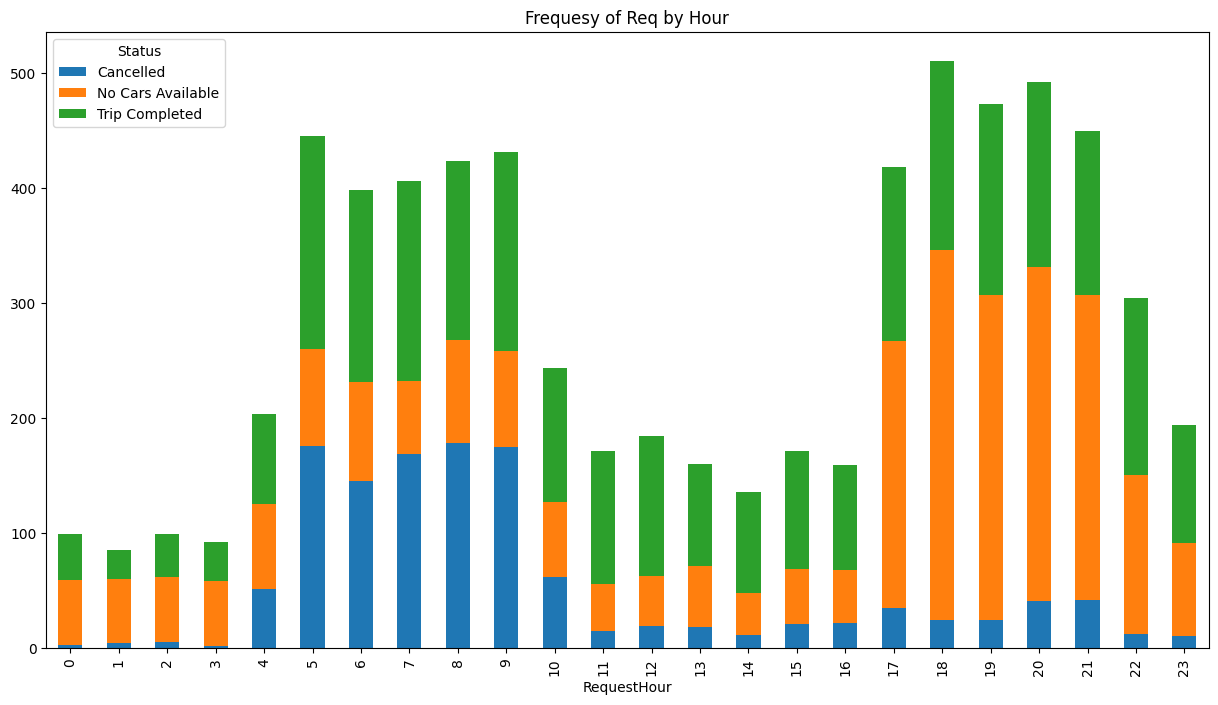

In [40]:
df.groupby(['RequestHour', 'Status']).size().unstack().plot(kind ='bar',
                                                            stacked = True, figsize =(15,8))
plt.title("Frequesy of Req by Hour")

<Axes: >

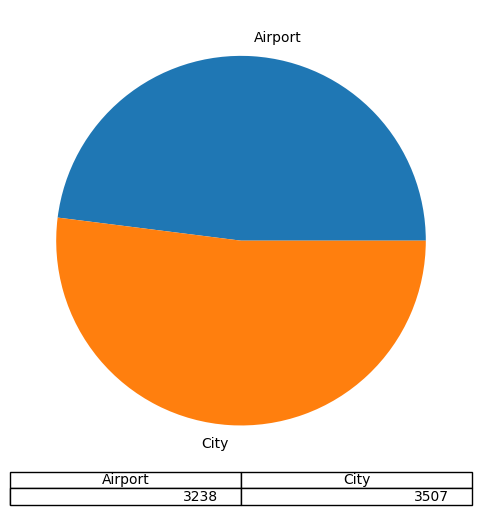

In [44]:
df.groupby(['Pickup point']).size().plot(kind = 'pie', figsize = (6,6), table =True)

<Axes: >

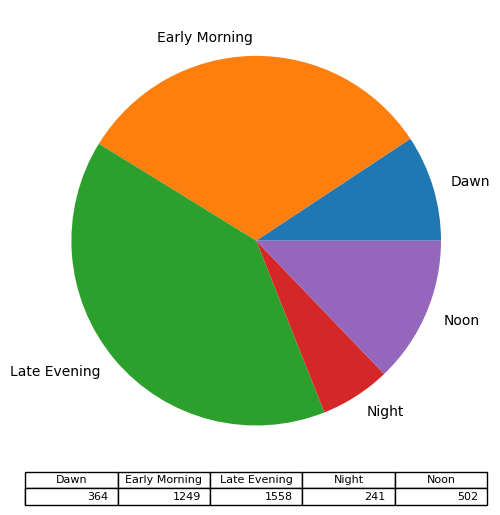

In [46]:
df[(df["Car Availability"]== "Not Available")].groupby(['TimeSlot']).size().plot(kind = 'pie', figsize = (6,6), table =True)

Text(0.5, 1.0, 'Frequency of Req by Hour from city to Airport')

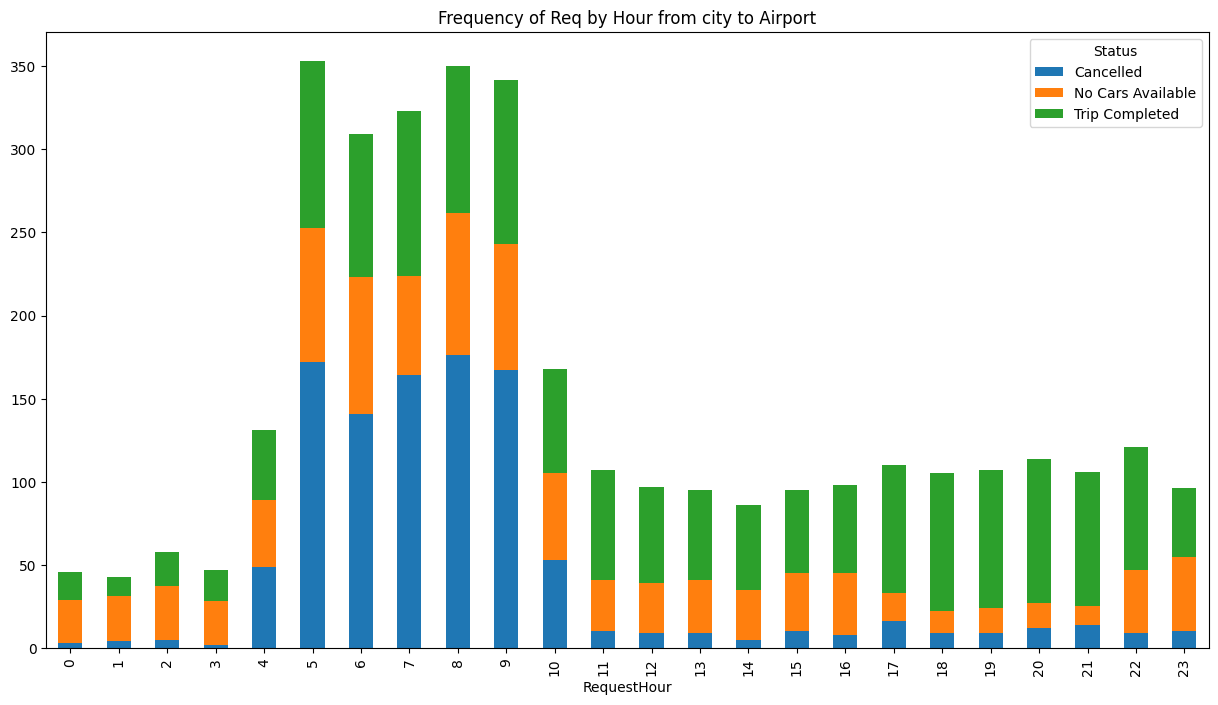

In [49]:
df[(df['Pickup point']== "City")].groupby(['RequestHour', 'Status']).size().unstack().plot(kind ='bar',
                                                            stacked = True, figsize =(15,8))
plt.title("Frequency of Req by Hour from city to Airport")

Text(0.5, 1.0, 'Frequency of Req by Hour from Airport to City')

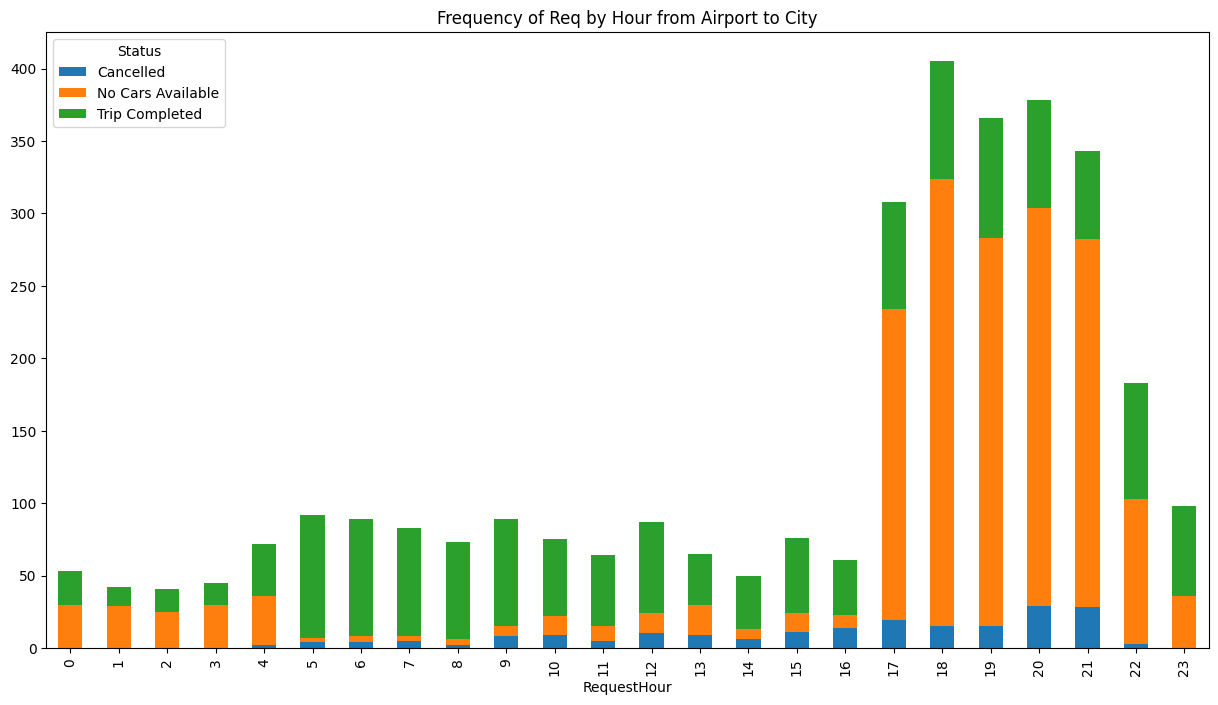

In [50]:
df[(df['Pickup point']== "Airport")].groupby(['RequestHour', 'Status']).size().unstack().plot(kind ='bar',
                                                            stacked = True, figsize =(15,8))
plt.title("Frequency of Req by Hour from Airport to City")